In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import evalml
import time

In [2]:
df = pd.read_csv('wustl-ehms-2020_with_attacks_categories.csv')
df.head()

,Dir,Flgs,SrcAddr,DstAddr,Sport,Dport,SrcBytes,DstBytes,SrcLoad,DstLoad,...,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Attack Category,Label
0,->,e,10.0.1.172,10.0.1.150,58059,1111,496,186,276914.0,92305.0,...,28.9,0,0,0,0,0,0,0.0,normal,0
1,->,e,10.0.1.172,10.0.1.150,58062,1111,496,186,230984.0,76995.0,...,28.9,0,0,0,0,78,17,0.4,normal,0
2,->,e,10.0.1.172,10.0.1.150,58065,1111,496,186,218470.0,72823.0,...,28.9,89,104,0,0,78,17,0.4,normal,0
3,->,e,10.0.1.172,10.0.1.150,58067,1111,496,186,203376.0,67792.0,...,28.9,89,104,0,0,79,17,0.4,normal,0
4,->,e,10.0.1.172,10.0.1.150,58069,1111,496,186,235723.0,78574.0,...,28.9,89,101,0,0,79,17,0.4,normal,0


In [3]:
df['Attack Category'].value_counts()

Attack Category
normal             14272
Spoofing            1124
Data Alteration      922
Name: count, dtype: int64

In [4]:
df.shape

(16318, 45)

In [5]:
df=df.sample(frac=1)
df.reset_index(drop=True,inplace=True)

In [6]:
df = df.loc[:, df.nunique() > 1]
df.shape

(16318, 35)

In [7]:
df.head(10)

,Flgs,Sport,SrcBytes,DstBytes,SrcLoad,DstLoad,SIntPkt,DIntPkt,SIntPktAct,SrcJitter,...,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Attack Category,Label
0,e,56049,496,186,217767.0,72589.0,4.555333,2.396500,0.0,3.657007,...,27.6,98,73,148,84,73,19,0.30,normal,0
1,e,52260,496,186,191210.0,63737.0,5.188000,3.011500,0.0,3.951946,...,28.2,98,73,148,84,73,19,0.30,normal,0
2,e,55117,496,186,216169.0,72056.0,4.589000,4.048000,0.0,3.351174,...,26.9,99,72,142,72,71,26,0.36,normal,0
3,e,63328,496,186,269078.0,89693.0,3.686667,2.059000,0.0,2.891623,...,28.6,98,76,147,85,79,15,0.22,normal,0
4,e,60495,496,186,119841.0,39947.0,8.277667,4.001000,0.0,6.914490,...,28.4,98,82,147,85,74,25,0.14,normal,0
5,e,57728,496,186,228800.0,76267.0,4.335667,2.455500,0.0,3.344684,...,27.6,99,78,147,85,81,0,0.16,normal,0
6,e,60487,496,186,253557.0,84519.0,3.912333,2.335000,0.0,2.956505,...,26.8,98,73,148,84,73,19,0.30,normal,0
7,e,50544,496,186,273580.0,91193.0,3.626000,2.529500,0.0,2.592206,...,26.4,97,69,134,79,75,19,0.22,normal,0
8,e,49200,496,186,262990.0,87663.0,3.772000,2.721500,0.0,2.676397,...,26.7,98,73,148,84,73,19,0.30,normal,0
9,e,56758,556,246,11401.0,4740.0,78.064250,75.464664,0.0,121.842641,...,25.9,97,83,143,78,82,14,0.14,normal,0


In [8]:
X = df.drop(['Attack Category','Label'],axis=1)
y = df['Attack Category']
y.value_counts()

Attack Category
normal             14272
Spoofing            1124
Data Alteration      922
Name: count, dtype: int64

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16318 entries, 0 to 16317
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Flgs        16318 non-null  object 
 1   Sport       16318 non-null  object 
 2   SrcBytes    16318 non-null  int64  
 3   DstBytes    16318 non-null  int64  
 4   SrcLoad     16318 non-null  float64
 5   DstLoad     16318 non-null  float64
 6   SIntPkt     16318 non-null  float64
 7   DIntPkt     16318 non-null  float64
 8   SIntPktAct  16318 non-null  float64
 9   SrcJitter   16318 non-null  float64
 10  DstJitter   16318 non-null  float64
 11  sMaxPktSz   16318 non-null  int64  
 12  dMaxPktSz   16318 non-null  int64  
 13  sMinPktSz   16318 non-null  int64  
 14  Dur         16318 non-null  float64
 15  TotPkts     16318 non-null  int64  
 16  TotBytes    16318 non-null  int64  
 17  Load        16318 non-null  float64
 18  Loss        16318 non-null  int64  
 19  pLoss       16318 non-nul

In [10]:
non_numeric_features = X.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_features

['Flgs', 'Sport', 'SrcMac']

In [11]:
X[non_numeric_features]

,Flgs,Sport,SrcMac
0,e,56049,84:3a:4b:0f:5b:94
1,e,52260,84:3a:4b:0f:5b:94
2,e,55117,84:3a:4b:0f:5b:94
3,e,63328,84:3a:4b:0f:5b:94
4,e,60495,84:3a:4b:0f:5b:94
...,...,...,...
16313,e,51564,84:3a:4b:0f:5b:94
16314,e,52952,84:3a:4b:0f:5b:94
16315,e,52832,84:3a:4b:0f:5b:94
16316,e,57563,84:3a:4b:0f:5b:94


In [12]:
le = LabelEncoder()
X['Sport'] = le.fit_transform(X['Sport'])

In [13]:
X.drop(['Flgs','SrcMac'],inplace=True,axis=1)
X.shape

(16318, 31)

In [14]:
y = pd.Series(le.fit_transform(y))

In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore

def remove_outliers(X, y, method='zscore', threshold=3):
    # Only consider numeric columns
    num_cols = X.select_dtypes(include=[np.number]).columns
    
    if method == 'zscore':
        # Z-score method to remove outliers
        z_scores = np.abs(zscore(X[num_cols]))
        outlier_mask = (z_scores > threshold).any(axis=1)  # Identify rows with outliers
        X_cleaned = X[~outlier_mask]  # Remove outliers from X
        y_cleaned = y[~outlier_mask]  # Remove corresponding rows from y
        print(f"Removed {outlier_mask.sum()} outliers using Z-score method.")
    
    elif method == 'iqr':
        # IQR method to remove outliers
        X_cleaned = X.copy()
        y_cleaned = y.copy()
        for col in num_cols:
            Q1 = X_cleaned[col].quantile(0.25)
            Q3 = X_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            mask = (X_cleaned[col] >= lower_bound) & (X_cleaned[col] <= upper_bound)
            X_cleaned = X_cleaned[mask]  # Apply filter to X
            y_cleaned = y_cleaned[mask]  # Apply filter to y
        print(f"Removed outliers using IQR method.")
    
    elif method == 'isolation_forest':
        # Isolation Forest method to remove outliers
        iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed
        outlier_mask = iso_forest.fit_predict(X[num_cols]) == -1  # -1 means outlier
        X_cleaned = X[~outlier_mask]  # Remove outliers from X
        y_cleaned = y[~outlier_mask]  # Remove corresponding rows from y
        print(f"Removed {outlier_mask.sum()} outliers using Isolation Forest.")
    
    else:
        raise ValueError("Invalid method. Choose from 'zscore', 'iqr', or 'isolation_forest'.")
    
    return X_cleaned, y_cleaned

# X_cleaned_zscore, y_cleaned_zscore = remove_outliers(X, y, method='zscore', threshold=3)  # Using Z-score method
# X_cleaned_iqr, y_cleaned_iqr = remove_outliers(X, y, method='iqr')  # Using IQR method
X, y = remove_outliers(X, y, method='isolation_forest')  # Using Isolation Forest method
X.shape

Removed 816 outliers using Isolation Forest.


(15502, 31)

In [16]:
y.value_counts()

2    14134
1     1115
0      253
Name: count, dtype: int64

In [17]:
tailed_features = ['SrcLoad','DstLoad','SIntPkt','DIntPkt','SrcJitter','DstJitter','Dur']

from sklearn.preprocessing import QuantileTransformer
from scipy.stats import skew, boxcox

# Initialize the quantile transformer
qt = QuantileTransformer(output_distribution='normal', random_state=42)
X_ = X.copy()
# Apply the transformation to the tailed features
X_[tailed_features] = qt.fit_transform(X_[tailed_features])

# Check skewness after transformation
for feature in tailed_features:
    print(f"Skewness of {feature}: {skew(X_[feature]):.2f}")


Skewness of SrcLoad: 0.01
Skewness of DstLoad: 0.02
Skewness of SIntPkt: 0.01
Skewness of DIntPkt: 0.03
Skewness of SrcJitter: -0.02
Skewness of DstJitter: 0.01
Skewness of Dur: 0.01


In [18]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def agrm_feature_selection(X, y, model=None):
    if model is None:
        model = GradientBoostingRegressor()
    
    # Fit the model
    model.fit(X, y)
    
    # Calculate feature importances
    feature_importances = np.abs(model.feature_importances_)
    
    # Rank features
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    return importance_df

def lofo_feature_selection(X, y, model=None, scoring='accuracy', cv=5):
    if model is None:
        model = RandomForestClassifier()
    
    feature_scores = {}
    
    # Use tqdm to show progress bar for the feature loop
    for feature in tqdm(X.columns, desc="LOFO Feature Selection", unit="feature"):
        X_temp = X.drop(columns=[feature])
        scores = cross_val_score(model, X_temp, y, scoring=scoring, cv=cv)
        feature_scores[feature] = scores.mean()
    
    # Sort features by their scores
    lofo_results = pd.DataFrame({
        'Feature': feature_scores.keys(),
        'Score': feature_scores.values()
    }).sort_values(by='Score', ascending=False)
    
    return lofo_results

def frufs_feature_selection(X, y, model=None, scoring=accuracy_score):
    if model is None:
        model = RandomForestClassifier()
    
    selected_features = []
    remaining_features = list(X.columns)
    best_score = 0
    
    # Use tqdm to show progress bar for feature selection iterations
    while remaining_features:
        scores = {}
        
        for feature in tqdm(remaining_features, desc="FRUFS Feature Selection", unit="feature"):
            current_features = selected_features + [feature]
            model.fit(X[current_features], y)
            y_pred = model.predict(X[current_features])
            scores[feature] = scoring(y, y_pred)
        
        best_feature = max(scores, key=scores.get)
        if scores[best_feature] > best_score:
            best_score = scores[best_feature]
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break
    
    return selected_features


In [19]:
X_.head()

,Sport,SrcBytes,DstBytes,SrcLoad,DstLoad,SIntPkt,DIntPkt,SIntPktAct,SrcJitter,DstJitter,...,Rate,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST
0,6844,496,186,-0.476140,-0.497071,0.483542,-0.308865,0.0,0.719854,-0.201672,...,439.046,13087,27.6,98,73,148,84,73,19,0.30
1,3066,496,186,-0.865125,-0.891934,0.883825,0.654930,0.0,0.923649,0.666971,...,385.505,11445,28.2,98,73,148,84,73,19,0.30
2,5915,496,186,-0.502789,-0.521707,0.510300,1.329333,0.0,0.497798,1.327832,...,435.825,10004,26.9,99,72,142,72,71,26,0.36
3,14108,496,186,0.869846,0.853876,-0.862391,-1.049558,0.0,-0.355532,-1.069945,...,542.495,10921,28.6,98,76,147,85,79,15,0.22
4,11277,496,186,-1.249038,-1.249263,1.258486,1.315855,0.0,1.335393,1.326083,...,241.614,10667,28.4,98,82,147,85,74,25,0.14


In [20]:
agrm = agrm_feature_selection(X_,y)
agrm

,Feature,Importance
9,DstJitter,4.614617e-01
6,DIntPkt,3.322171e-01
22,Packet_num,1.012121e-01
0,Sport,4.245260e-02
23,Temp,1.983640e-02
29,Resp_Rate,1.294817e-02
25,Pulse_Rate,9.925421e-03
8,SrcJitter,6.471997e-03
26,SYS,2.898438e-03
24,SpO2,2.679240e-03


In [21]:
agrm = agrm[agrm['Importance']>0]
agrm = agrm.Feature

In [22]:
X_ = X_[agrm]
X_.shape

(15502, 19)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X_)
X = pd.DataFrame(X_scaled, columns=X_.columns)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(np.array(X),y,test_size=0.2,stratify = y)

In [28]:
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, mean_absolute_error,
                           confusion_matrix, make_scorer)
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import mahalanobis, cdist
from scipy import stats
import time
import psutil
from typing import Dict, Any, Tuple
import warnings
warnings.filterwarnings('ignore')

class CompleteSafeML:
    def __init__(self, random_state: int = 42):
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.best_model = None
        self.training_metrics = {}
        self.training_distribution = None
        self.covariance = None
        self.mean_vector = None
        
        # Define the hyperparameter grid
        self.param_grid = {
            'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
            'max_iter': [50, 100, 200, 300],
            'max_depth': [3, 4, 5, 6],
            'min_samples_leaf': [10, 20, 50, 100],
            'l2_regularization': [0.0, 0.1, 1.0, 10.0]
        }
        
    def check_data_safety(self, X: np.ndarray, y: np.ndarray) -> bool:
        """Perform safety checks on input data"""
        try:
            # Check for NaN or infinite values
            if np.any(np.isnan(X)) or np.any(np.isinf(X)):
                print("NaN or infinite values found")
                return False
                
            # Check class balance - convert y to integers safely
            y_int = y.astype(int, copy=True)
            class_counts = np.bincount(y_int)
            if np.min(class_counts) / len(y) < 0.01:
                print("Severe class imbalance detected")
                
            # Check feature ranges
            if np.any(np.abs(X) > 1e6):
                print("Large values found")
                return False
                
            # Check minimum samples
            if len(X) < 100:
                print("Smaller sample found")
                return False
                    
            return True
        except Exception as e:
            print(f"Safety check failed: {str(e)}")
            return False
            
    def compute_distance_metrics(self, X: np.ndarray) -> Dict[str, np.ndarray]:
        """Compute distance metrics for outlier detection"""
        distances = {}
        
        if self.mean_vector is None:
            self.mean_vector = np.mean(X, axis=0)
            self.covariance = np.cov(X, rowvar=False)
            
        try:
            inv_covariance = np.linalg.inv(self.covariance)
            distances['mahalanobis'] = np.array([
                mahalanobis(x, self.mean_vector, inv_covariance) 
                for x in X
            ])
        except np.linalg.LinAlgError:
            distances['mahalanobis'] = np.zeros(X.shape[0])
            warnings.warn("Covariance matrix singular, Mahalanobis distance defaulted to 0")
            
        distances['euclidean_to_mean'] = np.sqrt(np.sum(
            (X - self.mean_vector) ** 2, axis=1
        ))
        
        distances['thresholds'] = {
            'mahalanobis': np.percentile(distances['mahalanobis'], 97.5),
            'euclidean': np.percentile(distances['euclidean_to_mean'], 97.5)
        }
        
        return distances
        
    def get_memory_usage(self) -> float:
        """Get current memory usage in MB"""
        process = psutil.Process()
        return process.memory_info().rss / 1024 / 1024
        
    def train_and_evaluate(self, X_train: np.ndarray, y_train: np.ndarray, 
                          X_test: np.ndarray, y_test: np.ndarray) -> Dict[str, Any]:
        """Complete training pipeline with Grid Search and safety checks"""
        
        # Initial safety checks
        if not self.check_data_safety(X_train, y_train):
            raise ValueError("Training data failed safety checks")
        if not self.check_data_safety(X_test, y_test):
            raise ValueError("Test data failed safety checks")
            
        # Initialize metrics
        metrics = {}
        initial_memory = self.get_memory_usage()
        start_time = time.time()
        
        # Store training distribution
        self.training_distribution = X_train.copy()
                
        # Compute distance metrics
        train_distances = self.compute_distance_metrics(X_train)
        
        # Initialize base classifier
        base_clf = HistGradientBoostingClassifier(random_state=self.random_state)
        
        # Set up GridSearchCV with multiple metrics
        scoring = {
            'accuracy': 'accuracy',
            'precision': 'precision_weighted',
            'recall': 'recall_macro',
            'f1': 'f1_weighted',
            'roc_auc': 'roc_auc_ovr_weighted'
        }
        
        # Perform grid search
        grid_search = GridSearchCV(
            estimator=base_clf,
            param_grid=self.param_grid,
            cv=5,
            n_jobs=-1,
            scoring=scoring,
            refit='f1',
            verbose=2
        )
        
        # Fit model
        grid_search.fit(X_train, y_train)
        
        # Record training time and memory
        training_time = time.time() - start_time
        memory_used = self.get_memory_usage() - initial_memory
        
        # Get best model
        self.best_model = grid_search.best_estimator_
        
        # Make predictions
        y_pred = self.best_model.predict(X_test)
        y_pred_proba = self.best_model.predict_proba(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        print("y_test shape:", y_test.shape)
        print("y_pred_proba shape:", y_pred_proba.shape)
    
        # Calculate comprehensive metrics
        metrics['grid_search'] = {
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'cv_results': grid_search.cv_results_
        }
        
        metrics['performance'] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted'),
            'recall': recall_score(y_test, y_pred, average='macro'),
            'f1_score': f1_score(y_test, y_pred, average='weighted'),
            'roc_auc': roc_auc_score(y_test, y_pred_proba, multi_class='ovr'),
            'mae': mean_absolute_error(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred).tolist()
        }
        
        metrics['resources'] = {
            'training_time': training_time,
            'memory_consumption': memory_used
        }
        
        metrics['safety'] = {
            'distance_metrics': train_distances,
            'class_balance': np.bincount(y_train).tolist(),
            'feature_ranges': {
                'min': X_train.min(axis=0).tolist(),
                'max': X_train.max(axis=0).tolist()
            }
        }
        
        return metrics
        
    def predict_with_safety(self, X: np.ndarray) -> Dict[str, Any]:
        """Make predictions with safety checks and confidence scores"""
        if not self.check_data_safety(X, np.zeros(len(X))):
            print(f"Prediction data failed safety checks \n {self.check_data_safety(X, np.zeros(len(X)))}")
            raise ValueError("Prediction data failed safety checks")
            
        # X_scaled = self.scaler.transform(X)
        distances = self.compute_distance_metrics(X)
        
        predictions = self.best_model.predict(X)
        probabilities = self.best_model.predict_proba(X)
        
        return {
            'predictions': predictions,
            'probabilities': probabilities,
            'confidence': np.max(probabilities, axis=1),
            'distances': distances,
            'is_outlier': (distances['mahalanobis'] > distances['thresholds']['mahalanobis']) | 
                         (distances['euclidean_to_mean'] > distances['thresholds']['euclidean'])
        }

# Example usage
def run_safe_ml_pipeline(X_train, y_train, X_test, y_test):
    # Initialize SafeML
    safe_ml = CompleteSafeML()
    
    # Train and evaluate
    print("Starting SafeML training pipeline...")
    metrics = safe_ml.train_and_evaluate(X_train, y_train, X_test, y_test)
    
    # Print comprehensive results
    print("\nTraining Results:")
    print("\n1. Grid Search Results:")
    print(f"Best Parameters: {metrics['grid_search']['best_params']}")
    print(f"Best CV Score: {metrics['grid_search']['best_score']:.6f}")
    
    print("\n2. Performance Metrics:")
    for metric, value in metrics['performance'].items():
        if metric != 'confusion_matrix':
            print(f"{metric}: {value:.6f}")
            
    print("\n3. Resource Usage:")
    print(f"Training Time: {metrics['resources']['training_time']:.4f} seconds")
    print(f"Memory Used: {metrics['resources']['memory_consumption']:.4f} MB")
    
    print("\n4. Safety Metrics:")
    print(f"Average Mahalanobis Distance: {np.mean(metrics['safety']['distance_metrics']['mahalanobis']):.6f}")
    print(f"Class Distribution: {metrics['safety']['class_balance']}")
    
    return safe_ml, metrics



In [29]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
import pandas as pd
import numpy as np
from typing import Dict, Any

class SafeMLVisualizer:
    def __init__(self, metrics: Dict[str, Any], figsize=(20, 12)):
        self.metrics = metrics
        self.figsize = figsize
        # Instead of using seaborn style directly, set a more reliable default style
        plt.style.use('default')
        # Apply seaborn aesthetic settings
        sns.set_theme()
        
    def plot_performance_metrics(self, save_path: str = None):
        """Plot performance metrics as a bar chart"""
        fig, ax = plt.subplots(figsize=self.figsize)
        metrics = {k: v for k, v in self.metrics['performance'].items() 
                  if isinstance(v, (int, float))}
        
        colors = sns.color_palette("husl", len(metrics))
        bars = ax.bar(range(len(metrics)), metrics.values(), color=colors)
        
        ax.set_xticks(range(len(metrics)))
        ax.set_xticklabels(metrics.keys(), rotation=45)
        ax.set_title('Performance Metrics', pad=20)
        ax.set_ylim(0, 1)
        
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.3f}', ha='center', va='bottom')
        
        if save_path:
            fig.savefig(save_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
            print(f"Performance metrics plot saved to {save_path}")
        else:
            plt.show()
        
        return fig
    
    def plot_confusion_matrix(self, save_path: str = None):
        """Plot confusion matrix as a heatmap"""
        fig, ax = plt.subplots(figsize=self.figsize)
        cm = np.array(self.metrics['performance']['confusion_matrix'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title('Confusion Matrix', pad=20)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
        
        if save_path:
            fig.savefig(save_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
            print(f"Confusion matrix plot saved to {save_path}")
        else:
            plt.show()
        
        return fig
    
    def plot_resource_usage(self, save_path: str = None):
        """Plot resource usage metrics"""
        fig, ax = plt.subplots(figsize=self.figsize)
        resources = self.metrics['resources']
        labels = ['Training Time (s)', 'Memory Usage (MB)']
        values = [resources['training_time'], resources['memory_consumption']]
        
        colors = sns.color_palette("Set2", 2)
        bars = ax.bar(labels, values, color=colors)
        
        ax.set_title('Resource Usage', pad=20)
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}', ha='center', va='bottom')
        
        if save_path:
            fig.savefig(save_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
            print(f"Resource usage plot saved to {save_path}")
        else:
            plt.show()
        
        return fig
    
    def plot_cv_results(self, save_path: str = None):
        """Plot cross-validation results"""
        fig, ax = plt.subplots(figsize=self.figsize)
        cv_results = self.metrics['grid_search']['cv_results']
        
        metrics_to_plot = ['test_accuracy', 'test_precision', 
                          'test_recall', 'test_f1']
        
        for metric in metrics_to_plot:
            mean_key = f'mean_{metric}'
            std_key = f'std_{metric}'
            if mean_key in cv_results:
                means = cv_results[mean_key]
                stds = cv_results[std_key]
                ax.plot(range(len(means)), means, label=metric.split('_')[1])
                ax.fill_between(range(len(means)), 
                              means - stds, means + stds, alpha=0.1)
        
        ax.set_title('Cross-validation Results', pad=20)
        ax.set_xlabel('CV Iteration')
        ax.set_ylabel('Score')
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
        if save_path:
            fig.savefig(save_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
            print(f"Cross-validation results plot saved to {save_path}")
        else:
            plt.show()
        
        return fig
    
    def plot_class_distribution(self, save_path: str = None):
        """Plot class distribution"""
        fig, ax = plt.subplots(figsize=self.figsize)
        class_dist = self.metrics['safety']['class_balance']
        total_samples = sum(class_dist)
        class_percentages = [count/total_samples*100 for count in class_dist]
        
        colors = sns.color_palette("Set3", len(class_dist))
        wedges, texts, autotexts = ax.pie(class_percentages, colors=colors,
                                         autopct='%1.1f%%', 
                                         labels=[f'Class {i}' for i in range(len(class_dist))])
        ax.set_title('Class Distribution', pad=20)
        
        if save_path:
            fig.savefig(save_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
            print(f"Class distribution plot saved to {save_path}")
        else:
            plt.show()
        
        return fig
    
    def plot_distance_metrics(self, save_path: str = None):
        """Plot distance metrics distribution"""
        fig, ax = plt.subplots(figsize=self.figsize)
        mahalanobis_dist = self.metrics['safety']['distance_metrics']['mahalanobis']
        euclidean_dist = self.metrics['safety']['distance_metrics']['euclidean_to_mean']
        thresholds = self.metrics['safety']['distance_metrics']['thresholds']
        
        sns.kdeplot(data=mahalanobis_dist, ax=ax, label='Mahalanobis Distance')
        sns.kdeplot(data=euclidean_dist, ax=ax, label='Euclidean Distance')
        
        ax.axvline(thresholds['mahalanobis'], color='r', linestyle='--', 
                   label='Mahalanobis Threshold')
        ax.axvline(thresholds['euclidean'], color='g', linestyle='--', 
                   label='Euclidean Threshold')
        
        ax.set_title('Distance Metrics Distribution', pad=20)
        ax.set_xlabel('Distance')
        ax.set_ylabel('Density')
        ax.legend()
        
        if save_path:
            fig.savefig(save_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
            print(f"Distance metrics plot saved to {save_path}")
        else:
            plt.show()
        
        return fig

def create_visualization_report(metrics: Dict[str, Any], save_path: str = None):
    """Create and optionally save a complete visualization report"""
    visualizer = SafeMLVisualizer(metrics)
    fig = visualizer.plot_dashboard()
    
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close(fig)
        print(f"Visualization saved to {save_path}")
    else:
        plt.show()
    
    return fig



In [30]:
safe_ml, metrics = run_safe_ml_pipeline(X_train, y_train, X_test, y_test)

Starting SafeML training pipeline...
Fitting 5 folds for each of 1280 candidates, totalling 6400 fits
y_test shape: (3101,)
y_pred_proba shape: (3101, 3)

Training Results:

1. Grid Search Results:
Best Parameters: {'l2_regularization': 0.0, 'learning_rate': 0.2, 'max_depth': 6, 'max_iter': 300, 'min_samples_leaf': 10}
Best CV Score: 0.983674

2. Performance Metrics:
accuracy: 0.982264
precision: 0.981806
recall: 0.935687
f1_score: 0.981683
roc_auc: 0.997037
mae: 0.018059

3. Resource Usage:
Training Time: 14130.4074 seconds
Memory Used: 11.9297 MB

4. Safety Metrics:
Average Mahalanobis Distance: 3.808549
Class Distribution: [202, 892, 11307]


In [31]:
# Make predictions on new data
predictions = safe_ml.predict_with_safety(X_test)
print("\nPrediction Summary:")
print(f"Number of outliers detected: {sum(predictions['is_outlier'])}")
print(f"Average prediction confidence: {np.mean(predictions['confidence']):.6f}")


Prediction Summary:
Number of outliers detected: 100
Average prediction confidence: 0.985605


In [32]:
# metrics

In [33]:
# create_visualization_report(metrics, save_path="safeml_report.png")

In [34]:
visualizer = SafeMLVisualizer(metrics)

Performance metrics plot saved to performance_metrics_multiclass.png


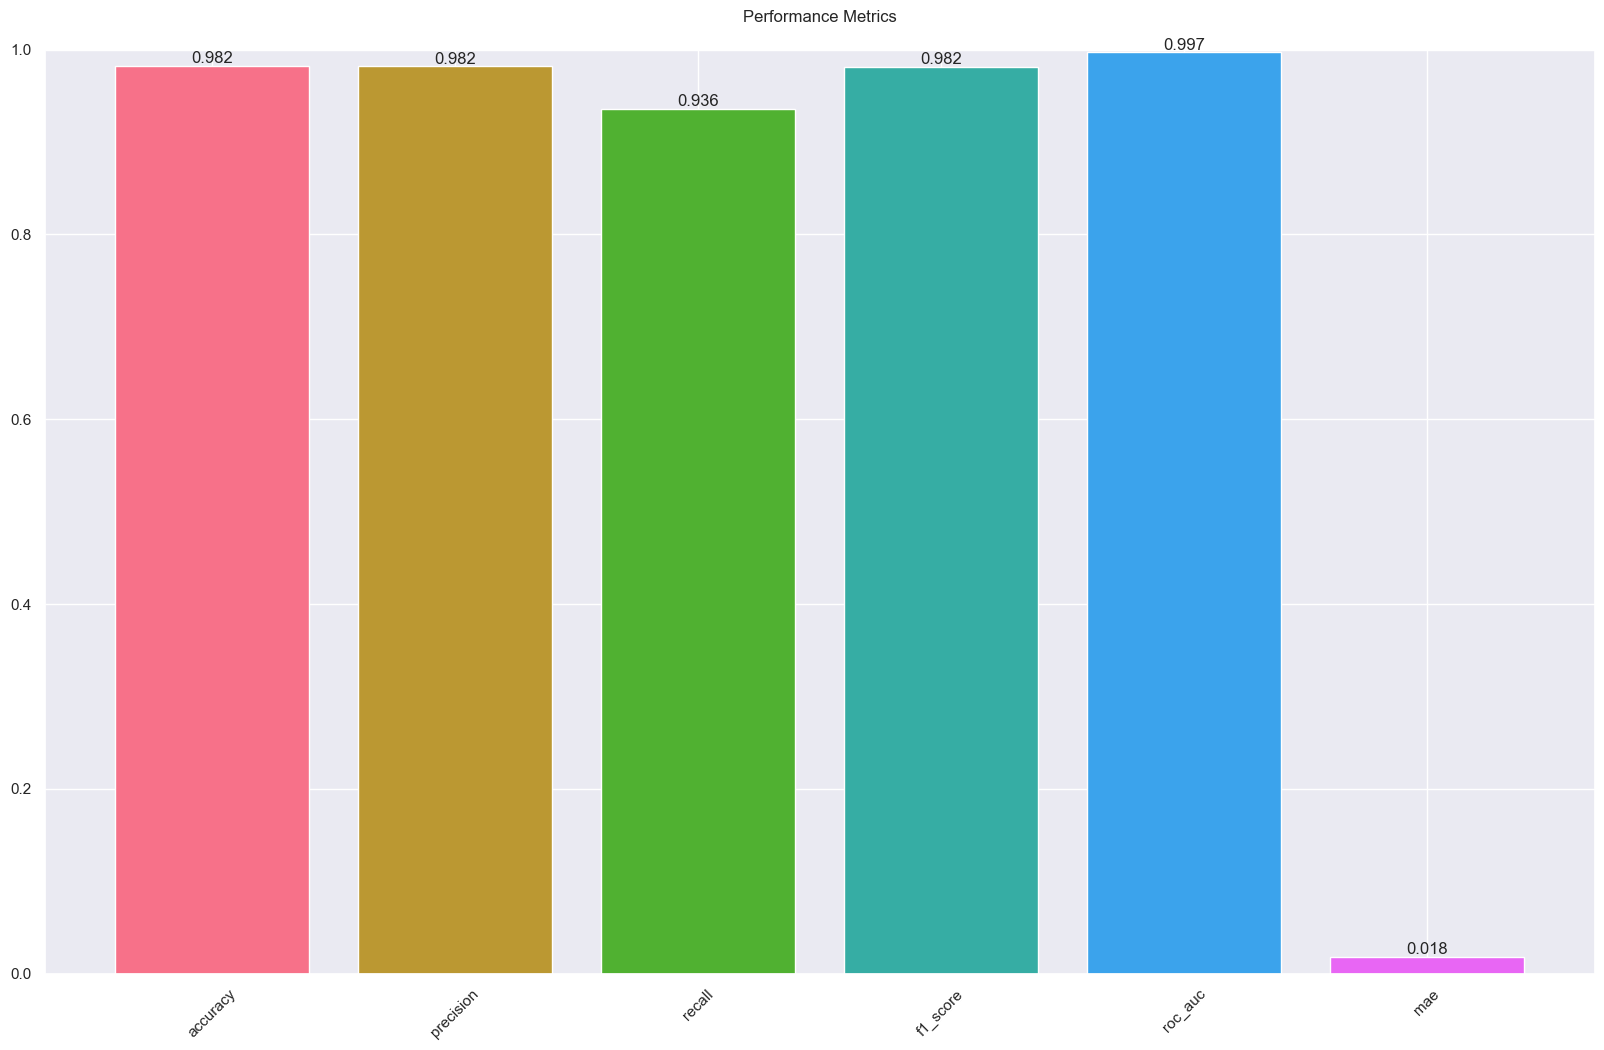

In [35]:
# Plot and save each visualization separately
visualizer.plot_performance_metrics(save_path='performance_metrics_multiclass.png')

Confusion matrix plot saved to confusion_matrix_multiclass.png


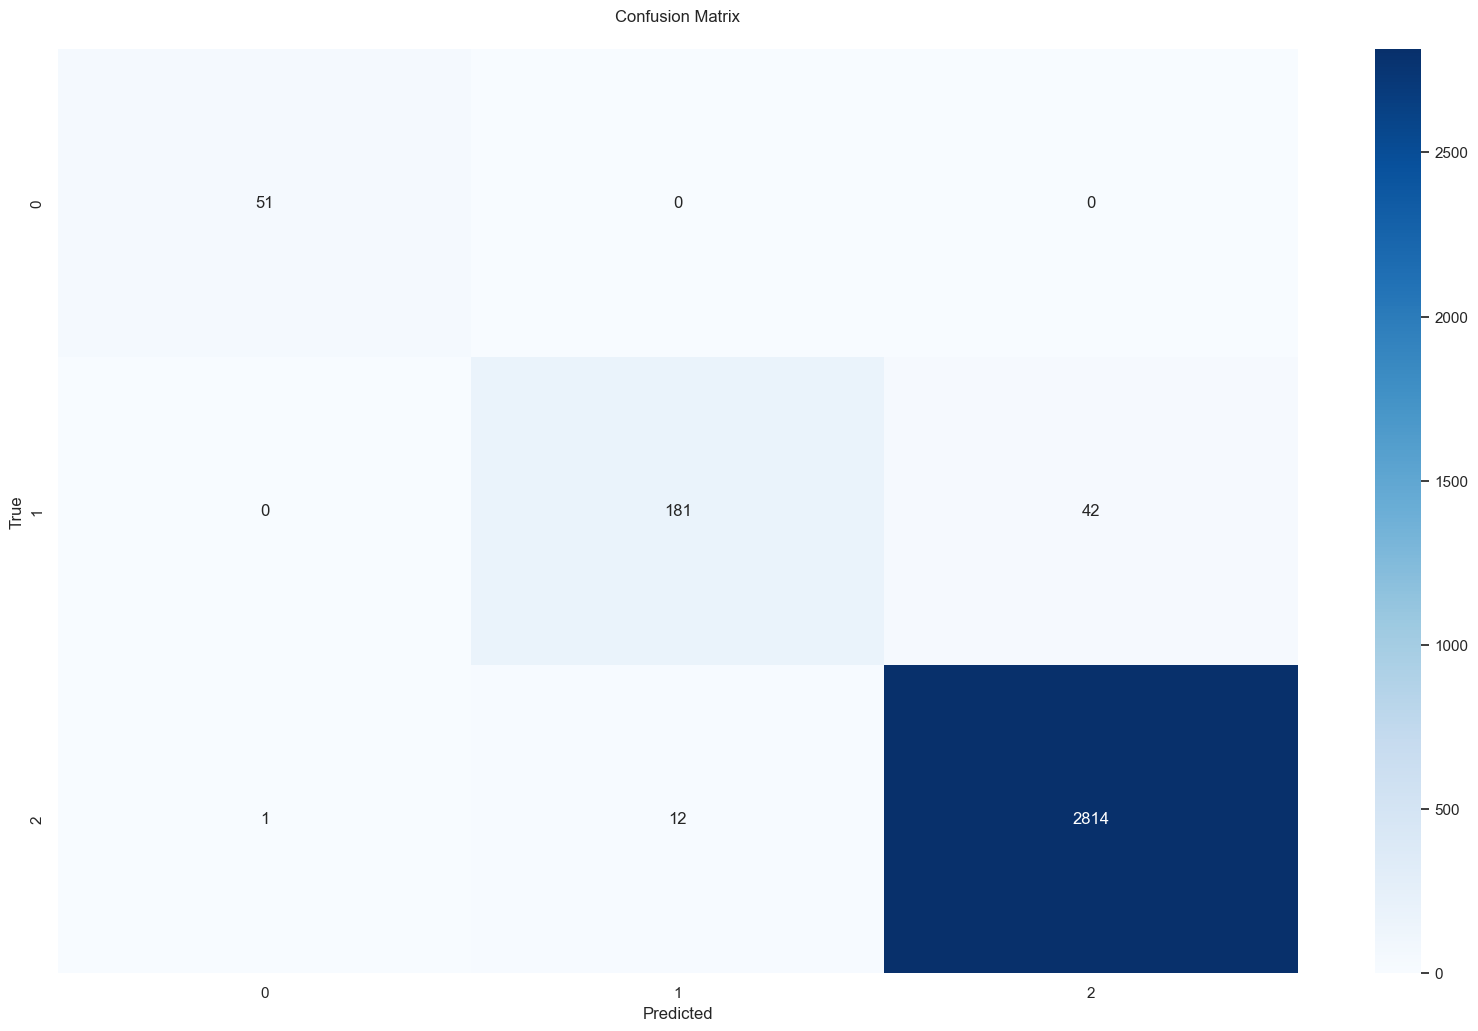

In [36]:
visualizer.plot_confusion_matrix(save_path='confusion_matrix_multiclass.png')

Resource usage plot saved to resource_usage_multiclass.png


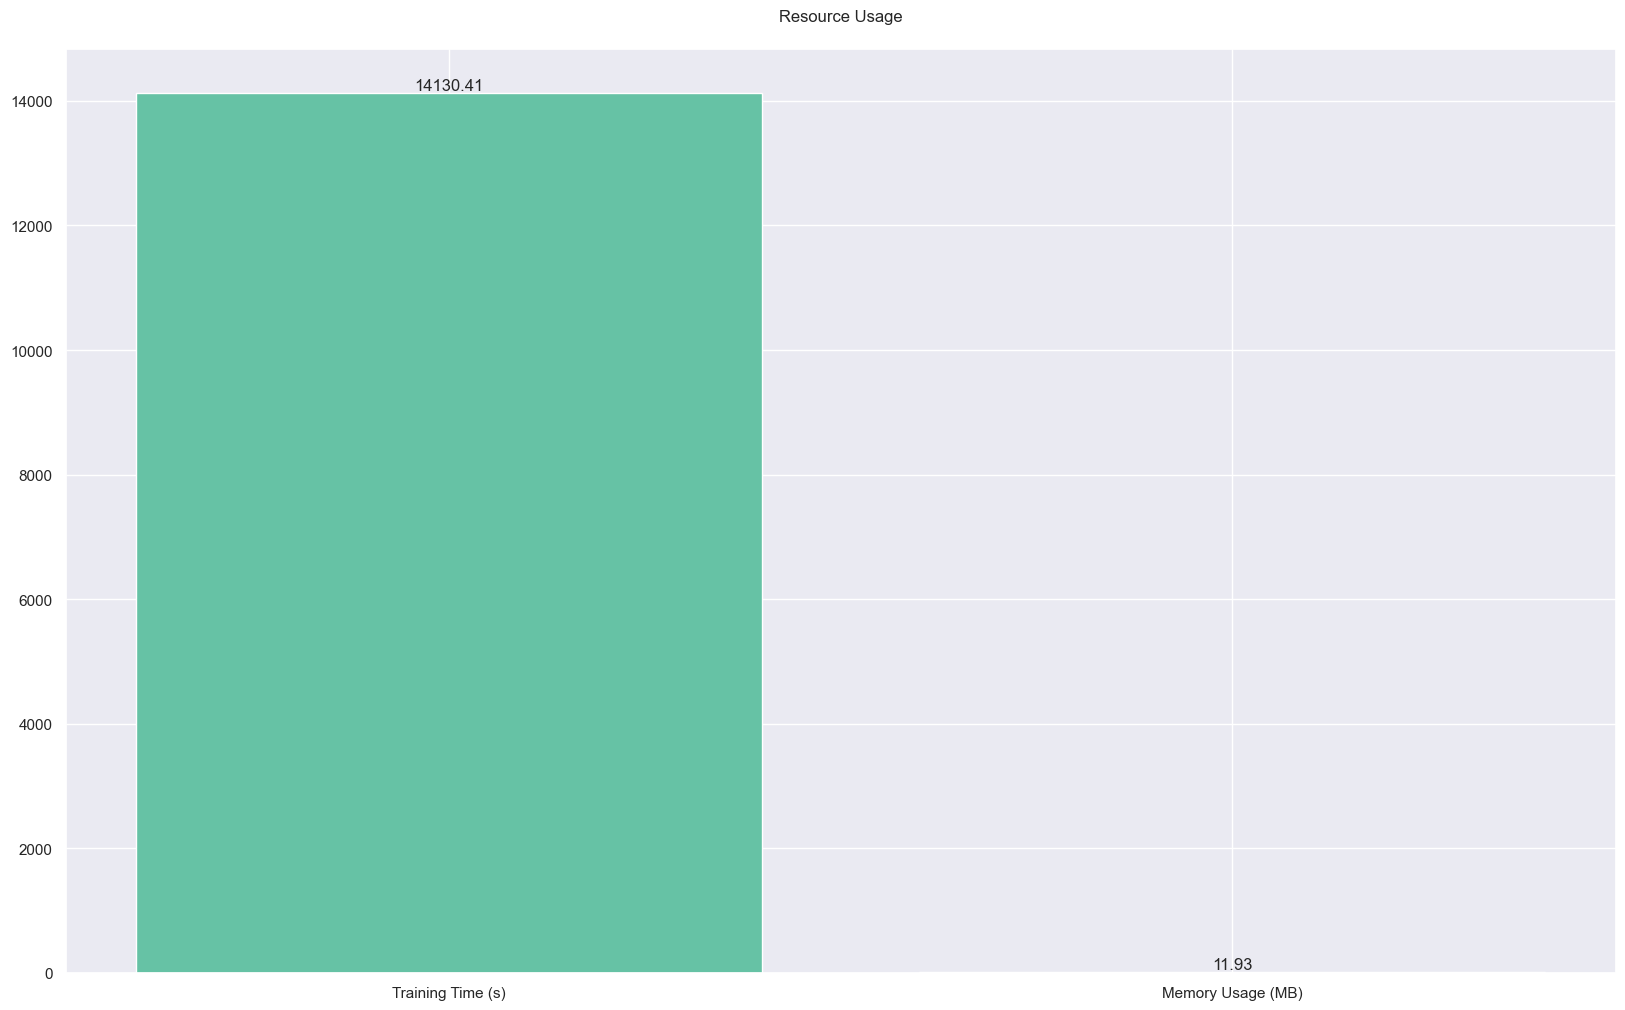

In [37]:
visualizer.plot_resource_usage(save_path='resource_usage_multiclass.png')

Cross-validation results plot saved to cv_results_multiclass.png


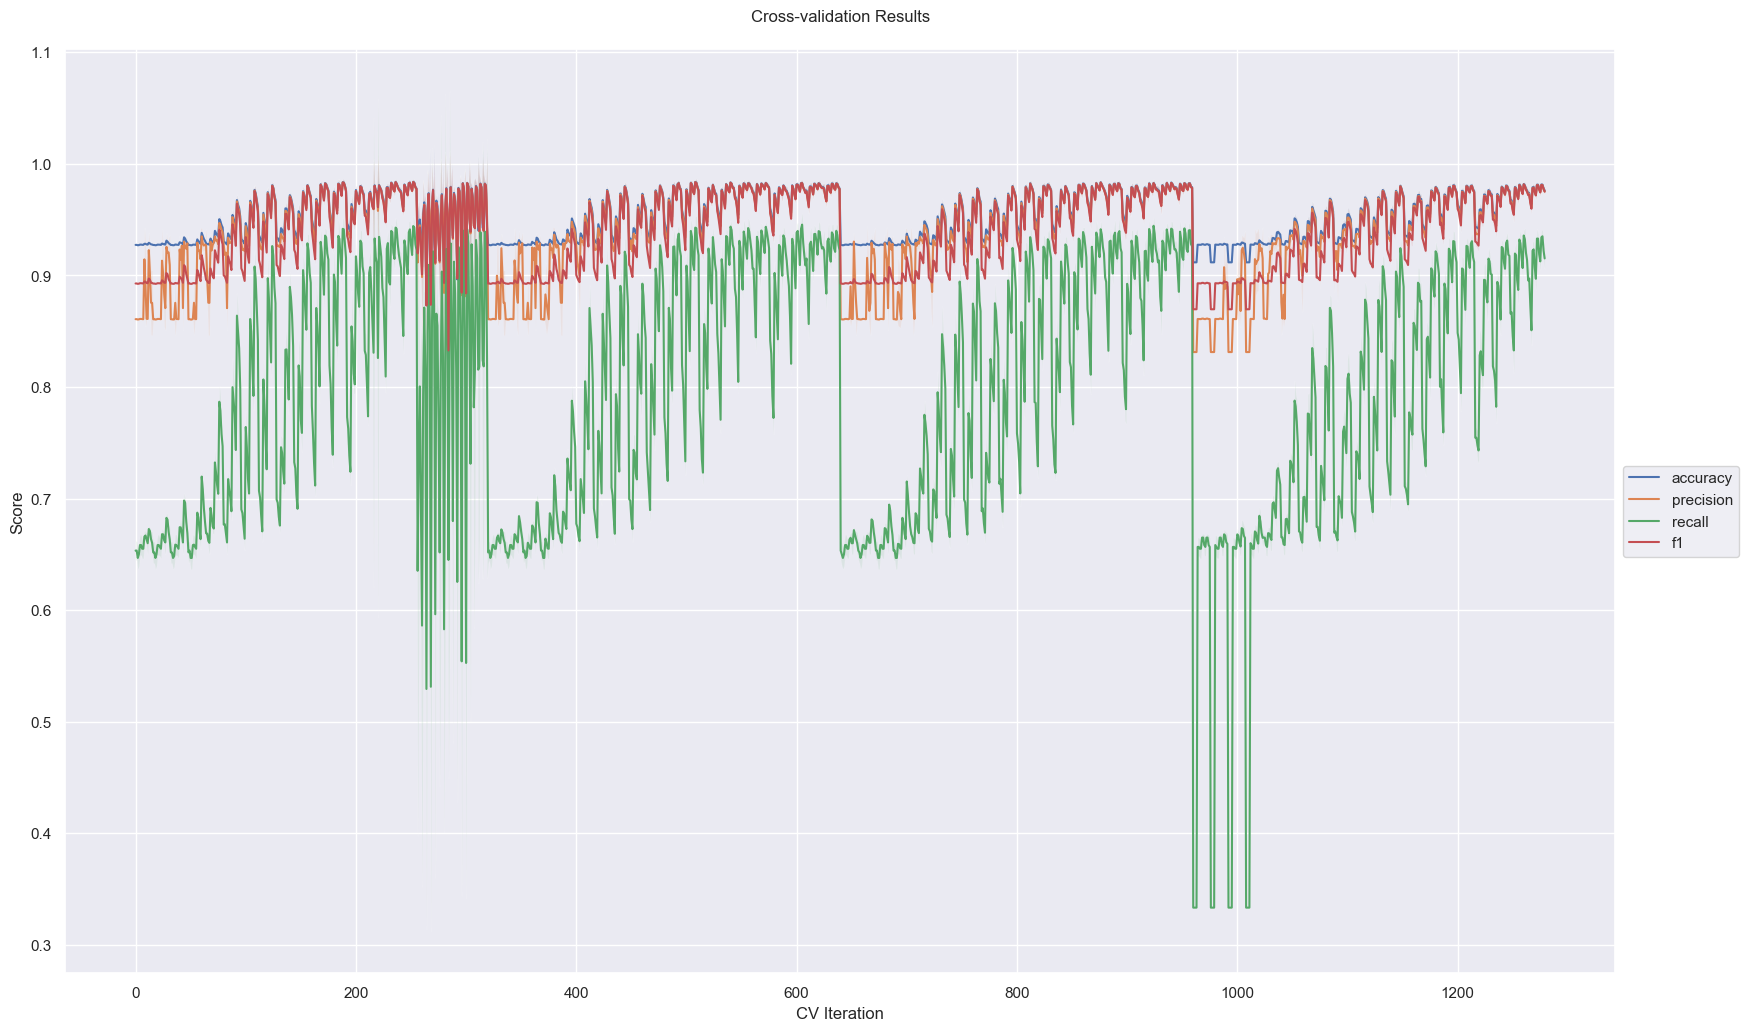

In [38]:
visualizer.plot_cv_results(save_path='cv_results_multiclass.png')

Class distribution plot saved to class_distribution_multiclass.png


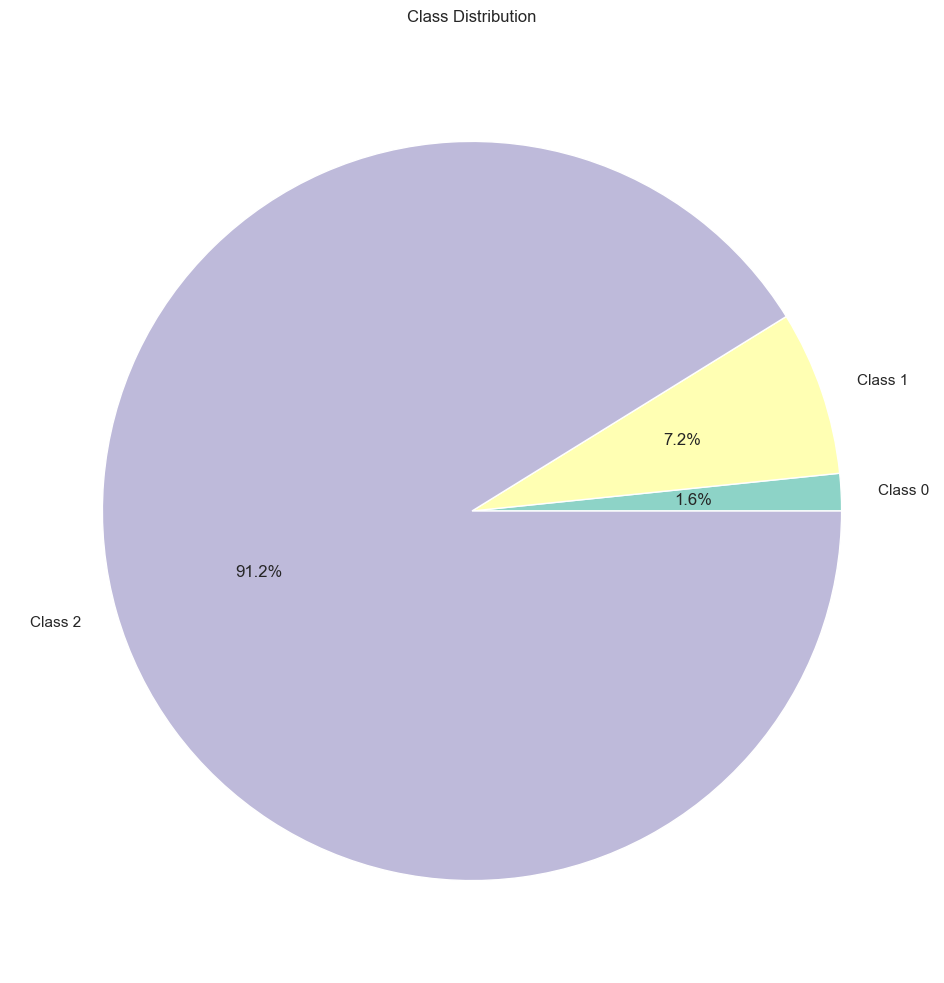

In [39]:
visualizer.plot_class_distribution(save_path='class_distribution_multiclass.png')

Distance metrics plot saved to distance_metrics_multiclass.png


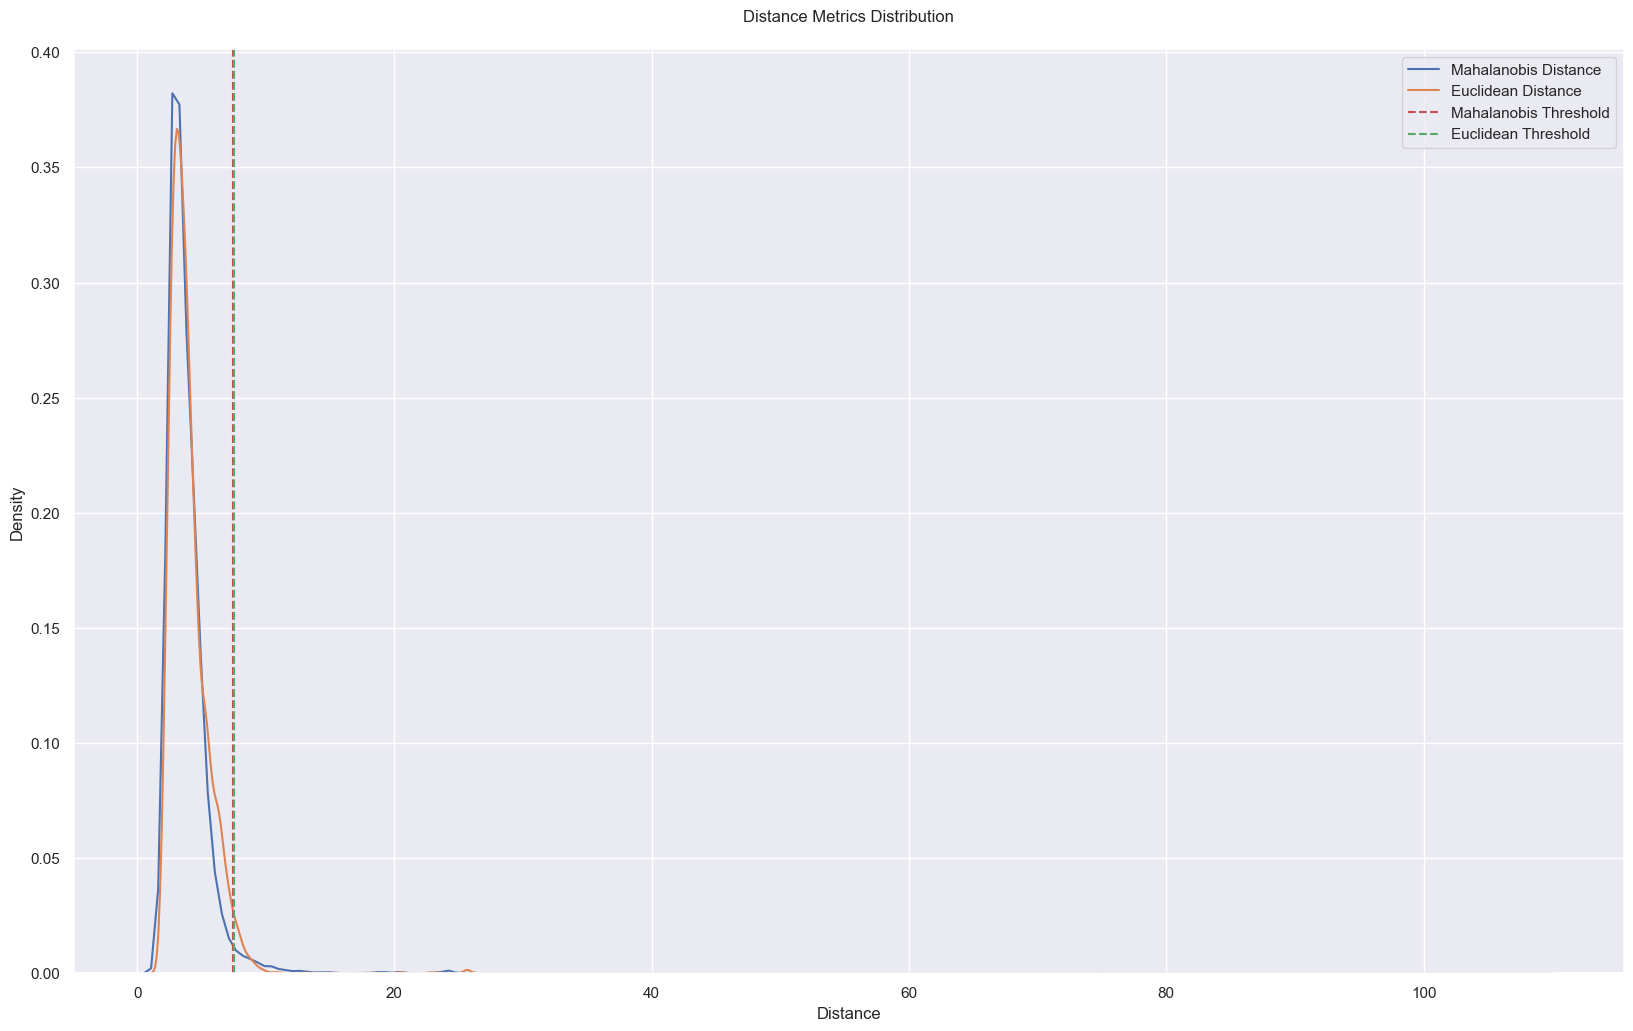

In [40]:
visualizer.plot_distance_metrics(save_path='distance_metrics_multiclass.png')